In [7]:
# import dependencies

import pandas as pd
import datetime
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path
import geopandas as gpd

In [8]:
df = pd.read_csv('../Resources/mi-cleaned-final.csv')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636527 entries, 0 to 636526
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              636527 non-null  int64  
 1   Date                    636527 non-null  object 
 2   FIPS Code-County        636527 non-null  int64  
 3   Min Ambient Temp        636527 non-null  float64
 4   Max Ambient Temp        636527 non-null  float64
 5   Mean Ambient Temp       636527 non-null  float64
 6   Min Dew Point           636527 non-null  float64
 7   Max Dew point           636527 non-null  float64
 8   Mean Dew Point          636527 non-null  float64
 9   Min Heat Index          636527 non-null  float64
 10  Max Heat Index          636527 non-null  float64
 11  Mean Heat Index         636527 non-null  float64
 12  Min WBGT                636527 non-null  float64
 13  Max WBGT                636527 non-null  float64
 14  Mean WBGT           

In [10]:
df2 = df.drop(columns=['Unnamed: 0','Low Threat','Elevated Threat','Moderate Threat','High Threat','Extreme Threat'])

In [11]:
# Convert "Date" to datetime format
df2['Date'] = pd.to_datetime(df['Date'].astype(str), format='mixed')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636527 entries, 0 to 636526
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    636527 non-null  datetime64[ns]
 1   FIPS Code-County        636527 non-null  int64         
 2   Min Ambient Temp        636527 non-null  float64       
 3   Max Ambient Temp        636527 non-null  float64       
 4   Mean Ambient Temp       636527 non-null  float64       
 5   Min Dew Point           636527 non-null  float64       
 6   Max Dew point           636527 non-null  float64       
 7   Mean Dew Point          636527 non-null  float64       
 8   Min Heat Index          636527 non-null  float64       
 9   Max Heat Index          636527 non-null  float64       
 10  Mean Heat Index         636527 non-null  float64       
 11  Min WBGT                636527 non-null  float64       
 12  Max WBGT                636527

In [12]:
# Step 1: Select relevant columns for clustering (ignoring FIPS Code itself initially)
weather_features = df2[['Min Ambient Temp', 'Max Ambient Temp', 'Mean Ambient Temp', 
                       'Min Dew Point', 'Max Dew point', 'Mean Dew Point',
                       'Min Heat Index', 'Max Heat Index', 'Mean Heat Index','Min WBGT','Max WBGT','Mean WBGT',
                       'Min Relative_Humidity', 'Max Relative_Humidity', 'Mean Relative_Humidity',
                       'DTR']]


In [13]:
 #Step 2: Standardize the features  
scaler = StandardScaler()
weather_features_scaled = scaler.fit_transform(weather_features)


c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\clust

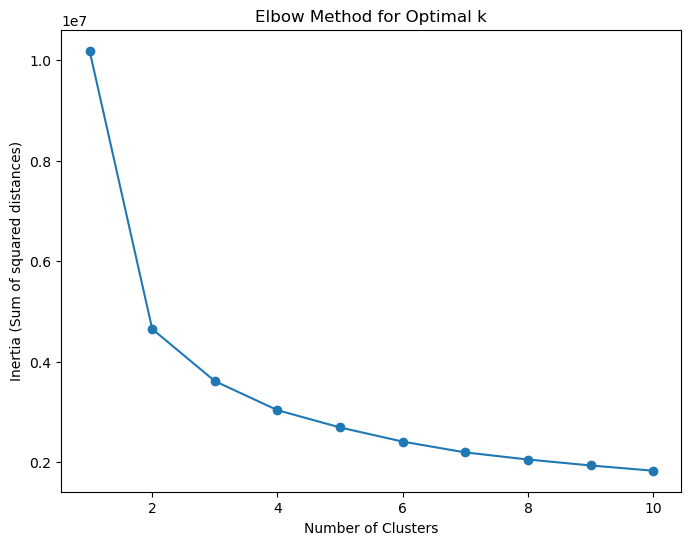

In [14]:

# Create a list to store inertia values for different numbers of clusters
inertia = []

# Loop over a range of cluster numbers
for n in range(1, 11):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(weather_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()

In [15]:
# Step 3: Apply k-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed
df2['Cluster'] = kmeans.fit_predict(weather_features_scaled)

c:\Users\jerom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


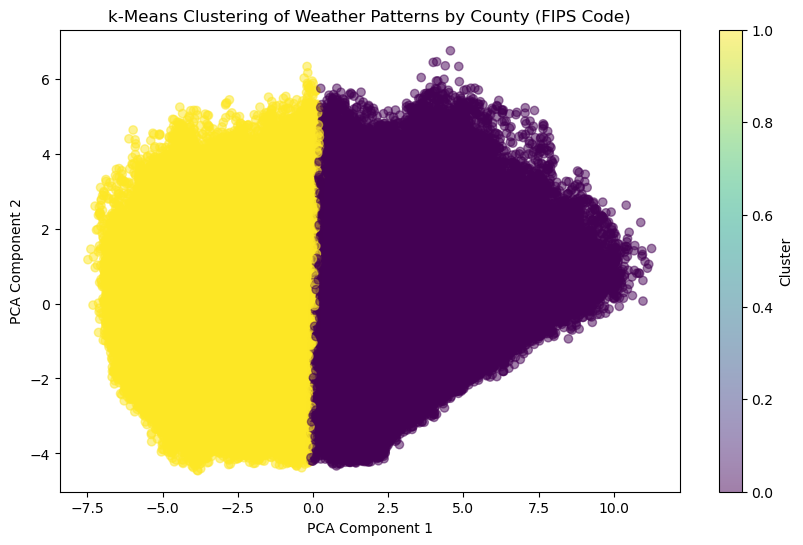

In [16]:
# Step 4: Visualize clusters (optional, using two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(weather_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df2['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('k-Means Clustering of Weather Patterns by County (FIPS Code)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
# Step 5: Analyze results
# Combine FIPS codes with clusters
clustered_fips_df = df2[['FIPS Code-County', 'Cluster']]

In [18]:
# Print cluster assignments
clustered_fips_df

,FIPS Code-County,Cluster
0,26001,0
1,26003,0
2,26005,1
3,26007,0
4,26009,0
...,...,...
636522,26157,0
636523,26159,0
636524,26161,0
636525,26163,0


In [19]:
# Get the cluster centers from the k-Means model (in the scaled space)
cluster_centers = kmeans.cluster_centers_

# Reverse the scaling to interpret the centers in the original feature space
original_centers = scaler.inverse_transform(cluster_centers)

# Convert to a DataFrame for better readability
centroids_df = pd.DataFrame(original_centers, columns=weather_features.columns)

# Print the centroids for each cluster
print(centroids_df)

   Min Ambient Temp  Max Ambient Temp  Mean Ambient Temp  Min Dew Point  \
0         22.931320         35.585840          29.128048      15.974123   
1         55.413907         71.034688          63.057323      48.436875   

   Max Dew point  Mean Dew Point  Min Heat Index  Max Heat Index  \
0      27.072561       21.365151       22.775319       34.704771   
1      57.864818       53.127344       54.733820       70.729571   

   Mean Heat Index   Min WBGT   Max WBGT  Mean WBGT  Min Relative_Humidity  \
0        28.639668  20.413548  37.278366  28.139337               0.752684   
1        62.582810  52.660590  69.887684  61.017143               0.781309   

   Max Relative_Humidity  Mean Relative_Humidity        DTR  
0               0.724101                0.732306  12.654521  
1               0.645503                0.708107  15.620781  


In [20]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(weather_features_scaled, clustered_fips_df['Cluster'])
print(f'Davies-Bouldin Index: {db_score:.4f}')


Davies-Bouldin Index: 0.8580


In [21]:
merge = pd.concat([clustered_fips_df,weather_features],axis=1)
merge

,FIPS Code-County,Cluster,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT,Min Relative_Humidity,Max Relative_Humidity,Mean Relative_Humidity,DTR
0,26001,0,30.326,45.014000,36.824,28.652000,43.844000,36.104,30.326,43.718,36.428,29.012,44.024000,36.032,0.934051,0.956410,0.971976,14.688000
1,26003,0,23.972,31.136000,27.662,19.616000,28.778000,24.584,23.972,31.136,27.662,21.938,30.668000,26.150,0.831948,0.908560,0.880373,7.164000
2,26005,1,37.742,53.419999,45.986,35.258000,48.397999,43.196,37.544,52.322,44.834,36.158,53.563999,45.032,0.906604,0.830344,0.899241,15.677999
3,26007,0,27.356,43.034000,35.780,24.962000,42.080000,34.790,27.356,41.576,35.528,25.952,42.080000,35.006,0.905671,0.964018,0.961469,15.678000
4,26009,0,27.878,43.376000,35.330,25.610000,40.712000,32.972,27.878,41.648,35.024,26.492,42.242000,34.070,0.910638,0.902519,0.910216,15.498000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636522,26157,0,26.564,38.732000,32.072,17.330001,36.770000,27.104,26.564,38.732,32.072,23.540,38.156000,30.200,0.677210,0.925882,0.816781,12.168000
636523,26159,0,29.228,38.570000,32.882,20.408000,38.138000,29.246,29.228,38.570,32.882,26.492,38.264000,31.460,0.692572,0.983232,0.863191,9.342000
636524,26161,0,27.968,42.746000,34.016,17.041999,41.432000,28.904,27.968,41.216,33.728,25.124,42.152000,32.054,0.631275,0.950679,0.813450,14.778000
636525,26163,0,29.462,43.448000,35.150,19.436000,41.990000,29.822,29.462,41.936,34.808,26.546,42.782000,33.116,0.658164,0.945573,0.807197,13.986000


In [24]:
# export csv 
merge.to_csv('../Resources/mi-merge-map.csv')

Text(0.5, 1.0, 'Climasense AI Michigan County Breakdown')

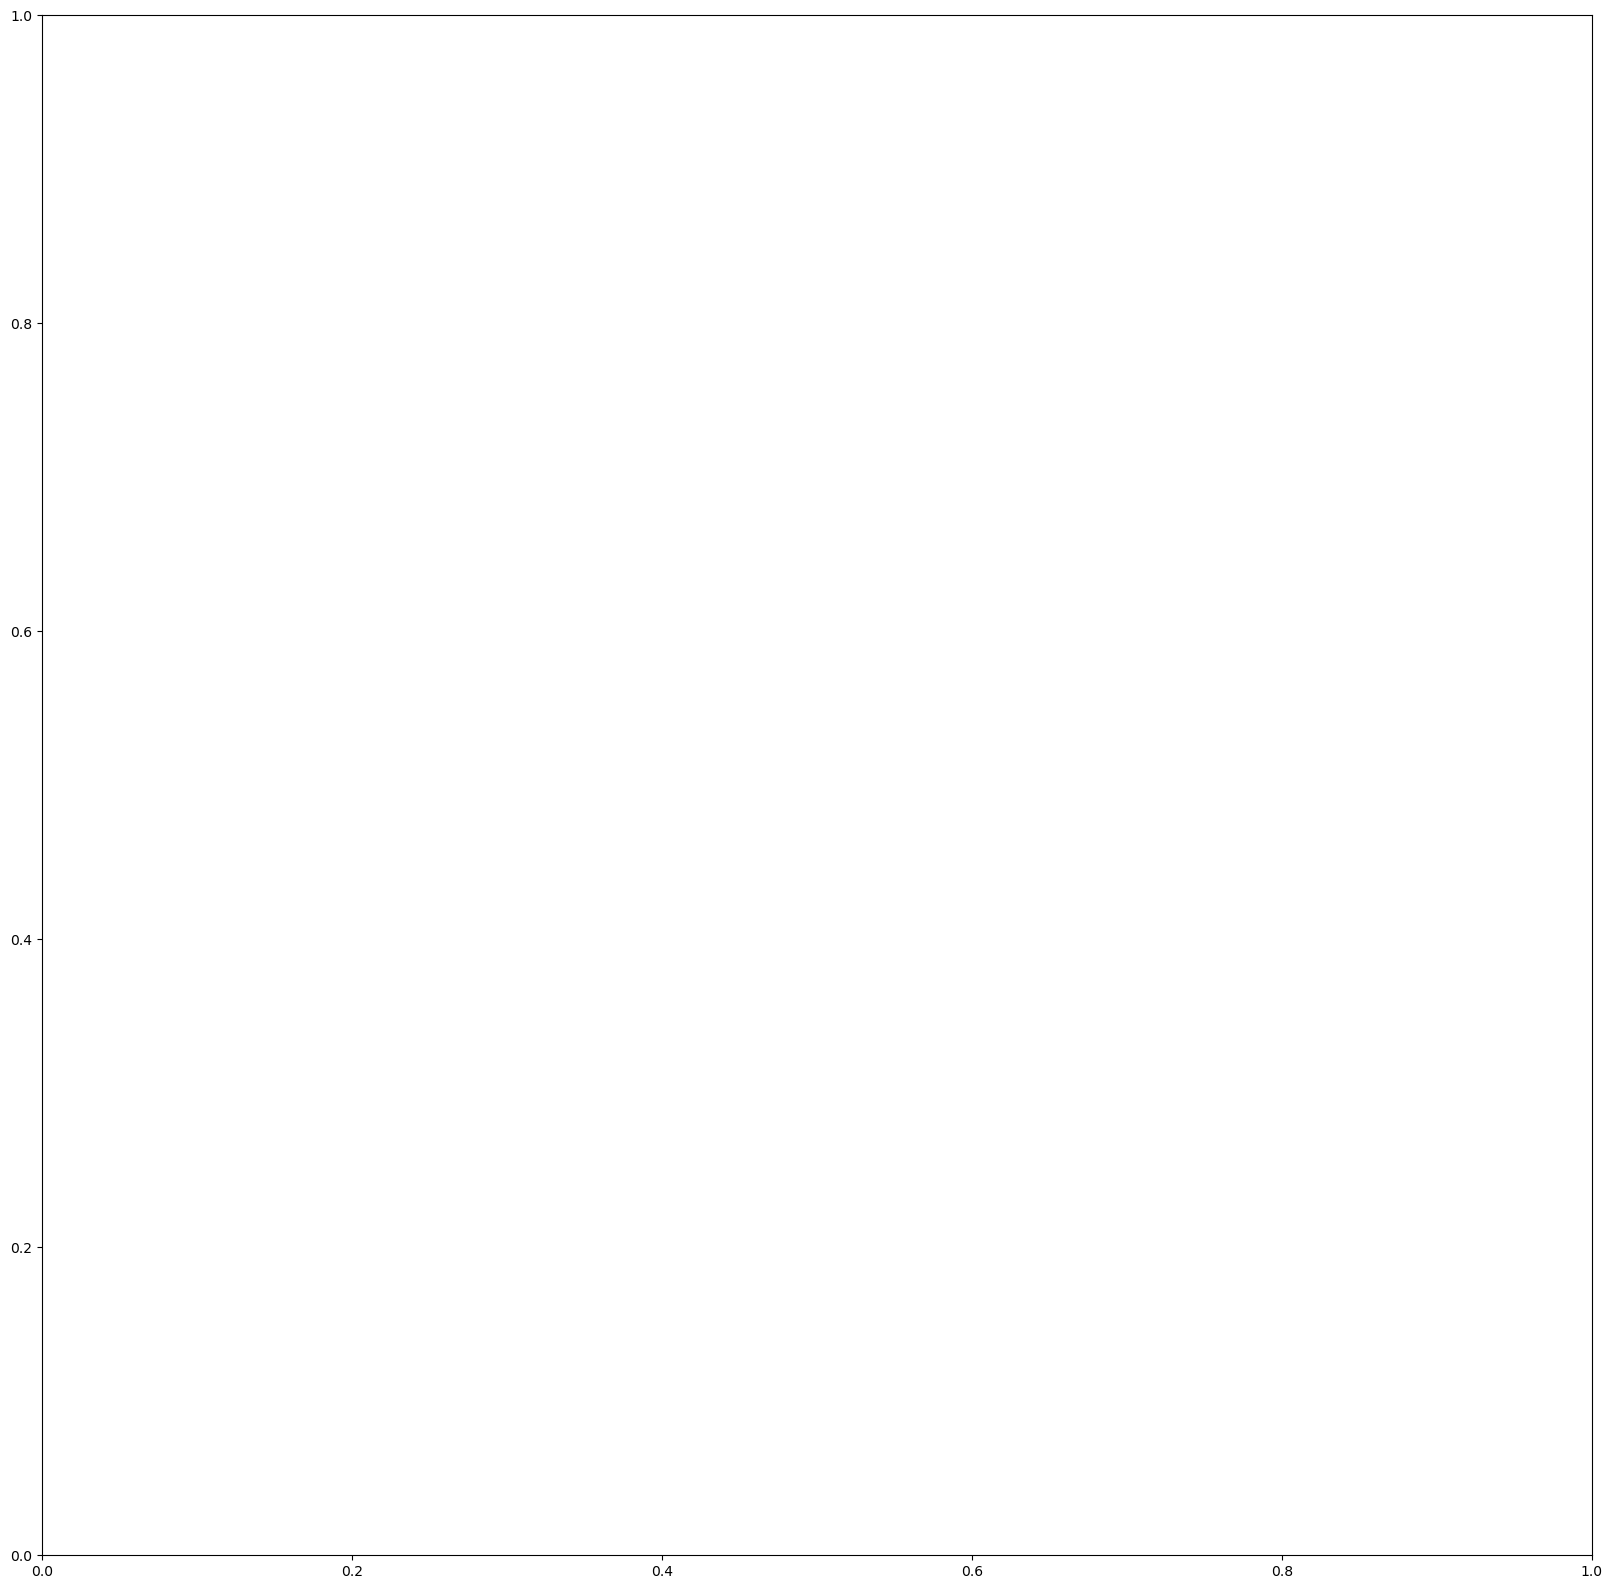

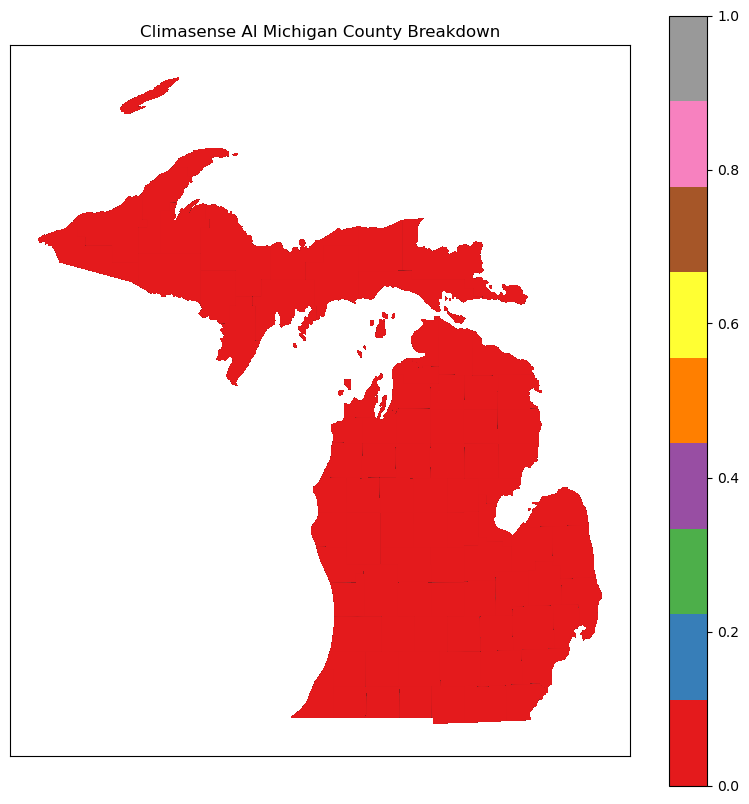

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your temperature dataset (with FIPS codes)
mi_map = pd.read_csv('../Resources/mi-merge-map.csv')

# Load the US counties shapefile from Geopandas datasets or use a custom shapefile
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip"
counties_gdf = gpd.read_file(url)

# Convert both FIPS Code columns to strings for consistency
mi_map['FIPS Code-County'] = mi_map['FIPS Code-County'].astype(str)
counties_gdf['GEOID'] = counties_gdf['GEOID'].astype(str)

# Merge your temperature data with the counties shapefile on the FIPS code
merged_gdf = counties_gdf.merge(mi_map, left_on='GEOID', right_on='FIPS Code-County')

# Create a plot figure
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the merged GeoDataFrame and remove the axis ticks and labels
ax = merged_gdf.plot(column='Cluster', cmap='Set1', legend=True, figsize=(10, 10))

# Remove the axis labels and tick marks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels

# Set the title
plt.title('Climasense AI Michigan County Breakdown')


Text(0.5, 1.0, 'Climasense AI Texas County Breakdown')

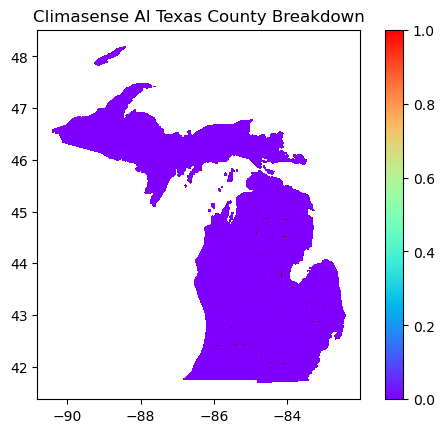

In [31]:


# Load your temperature dataset (with FIPS codes)
# Example of loading a CSV file (replace this with your actual dataset)
mi_map = pd.read_csv('../Resources/mi-merge-map.csv')

# Load the US counties shapefile from Geopandas datasets or use a custom shapefile
# The Geopandas dataset for US counties includes FIPS codes
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip"
counties_gdf = gpd.read_file(url)

# Convert both FIPS Code columns to strings for consistency
mi_map['FIPS Code-County'] = mi_map['FIPS Code-County'].astype(str)
counties_gdf['GEOID'] = counties_gdf['GEOID'].astype(str)


# Merge your temperature data with the counties shapefile on the FIPS code
merged_gdf = counties_gdf.merge(mi_map, left_on='GEOID', right_on='FIPS Code-County')

# Plot the merged GeoDataFrame and remove the axis ticks and labels
merged_gdf.plot(column='Cluster', cmap='rainbow', legend=True,)


# Set the title
plt.title('Climasense AI Texas County Breakdown')
